In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
plt.rc("font", size=20)

In [9]:
bookings = pd.read_csv(r'...\bookings.csv', sep=';',  parse_dates=['booking_created_date'])
flyers = pd.read_csv(r'...\flyers.csv', sep=';', parse_dates=['flyer_date'])

In [219]:
bookings.head()

,business_id,booking_created_date,category_main,booking_source,booking_id
0,1,2018-03-11,Hair salons,Android,739653
1,1,2018-06-11,Hair salons,iPhone,741682
2,1,2018-06-11,Hair salons,iPhone,741683
3,1,2018-06-11,Hair salons,iPhone,741684
4,1,2018-11-16,Hair salons,Android,749074


Spójrzmy ile bookingów było każdego dnia

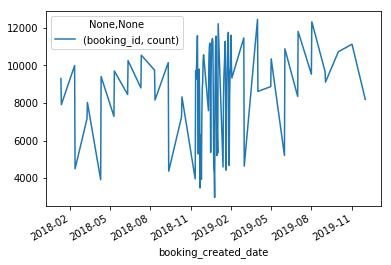

In [51]:
bookings[['booking_created_date', 'booking_id']].groupby(['booking_created_date']).agg(['count']).plot()

Ile firm wypuscilo DFy danego dnia

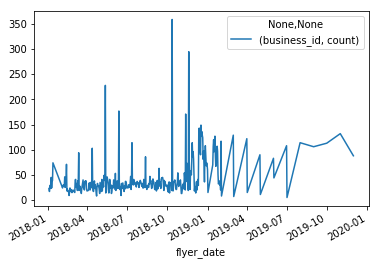

In [39]:
flyers[['flyer_date', 'business_id']].groupby(['flyer_date']).agg(['count']).plot()

In [12]:
print (bookings.business_id.nunique(), flyers.business_id.nunique(),bookings.count() )

3270 4842 business_id             875538
booking_created_date    875538
category_main           875538
booking_source          875538
booking_id              875538
dtype: int64


In [134]:
flyiers_visit = flyers.merge(bookings,on='business_id',how='inner')

In [14]:
print (flyiers_visit.business_id.nunique(), flyiers_visit.count())

3270 business_id             3538424
flyer_date              3538424
booking_created_date    3538424
category_main           3538424
booking_source          3538424
booking_id              3538424
dtype: int64


In [135]:
flyiers_visit['flyer_date_num'] = pd.to_numeric(flyiers_visit.flyer_date)
flyiers_visit['booking_date_num'] = pd.to_numeric(flyiers_visit.booking_created_date)

In [136]:
flyiers_visit['diff'] = (flyiers_visit['booking_created_date'] - flyiers_visit['flyer_date'])
flyiers_visit['diff_num'] = (flyiers_visit['booking_date_num'] - flyiers_visit['flyer_date_num'])
flyiers_visit['diff_num'] = flyiers_visit['diff_num'] / (3600000000000*24)

In [29]:
flyiers_visit.head()

,business_id,flyer_date,booking_created_date,category_main,booking_source,booking_id,flyer_date_num,booking_date_num,diff,diff_num
0,1,2018-03-28,2018-03-11,Hair salons,Android,739653,1522195200000000000,1520726400000000000,-17 days,-17.0
1,1,2018-03-28,2018-06-11,Hair salons,iPhone,741682,1522195200000000000,1528675200000000000,75 days,75.0
2,1,2018-03-28,2018-06-11,Hair salons,iPhone,741683,1522195200000000000,1528675200000000000,75 days,75.0
3,1,2018-03-28,2018-06-11,Hair salons,iPhone,741684,1522195200000000000,1528675200000000000,75 days,75.0
4,1,2018-03-28,2018-11-16,Hair salons,Android,749074,1522195200000000000,1542326400000000000,233 days,233.0


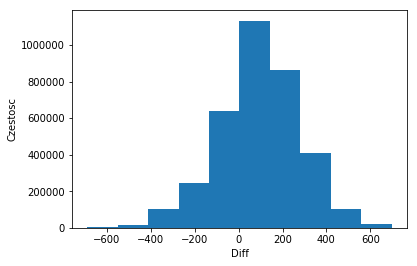

<Figure size 432x288 with 0 Axes>

In [30]:
%matplotlib inline
import numpy as np

plt.hist(data = flyiers_visit, x= 'diff_num')
plt.ylabel('Czestosc')
plt.xlabel('Roznica pomiedzy DFem a bookingiem')
fig=plt.figure()
plt.show();

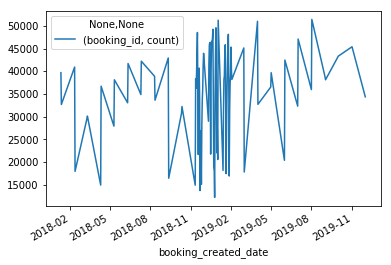

In [32]:
flyiers_visit[['booking_created_date', 'booking_id']].groupby(['booking_created_date']).agg(['count']).plot()

Na razie spójrzmy tylko na bookingi, które zostały zrobione przed wypuszczeniem pierwszego DFa i po wypuszczeniu 1 DFa

In [130]:
first_flyer = first_flyer.rename(columns={'flyer_date': 'first_fly','business_id':'business_id' })
print (first_flyer.columns)

Index(['business_id', 'first_fly'], dtype='object')


In [137]:
flyiers_visit = flyiers_visit.merge(first_flyer,on='business_id',how='inner')

In [138]:
flyiers_visit.head()

,business_id,flyer_date,booking_created_date,category_main,booking_source,booking_id,flyer_date_num,booking_date_num,diff,diff_num,first_fly
0,1,2018-03-28,2018-03-11,Hair salons,Android,739653,1522195200000000000,1520726400000000000,-17 days,-17.0,2018-03-28
1,1,2018-03-28,2018-06-11,Hair salons,iPhone,741682,1522195200000000000,1528675200000000000,75 days,75.0,2018-03-28
2,1,2018-03-28,2018-06-11,Hair salons,iPhone,741683,1522195200000000000,1528675200000000000,75 days,75.0,2018-03-28
3,1,2018-03-28,2018-06-11,Hair salons,iPhone,741684,1522195200000000000,1528675200000000000,75 days,75.0,2018-03-28
4,1,2018-03-28,2018-11-16,Hair salons,Android,749074,1522195200000000000,1542326400000000000,233 days,233.0,2018-03-28


In [195]:
booking_only_after = flyiers_visit[flyiers_visit['first_fly'] < flyiers_visit['booking_created_date']]

In [196]:
booking_only_before = flyiers_visit[flyiers_visit['first_fly'] > flyiers_visit['booking_created_date']]

In [150]:
print (booking_only_before.business_id.nunique(), booking_only_before.booking_id.nunique())

3103 664629


In [152]:
print (booking_only_after.business_id.nunique(), booking_only_after.booking_id.nunique())

2642 205639


In [197]:
booking_only_after.head()

,business_id,flyer_date,booking_created_date,category_main,booking_source,booking_id,flyer_date_num,booking_date_num,diff,diff_num,first_fly
1,1,2018-03-28,2018-06-11,Hair salons,iPhone,741682,1522195200000000000,1528675200000000000,75 days,75.0,2018-03-28
2,1,2018-03-28,2018-06-11,Hair salons,iPhone,741683,1522195200000000000,1528675200000000000,75 days,75.0,2018-03-28
3,1,2018-03-28,2018-06-11,Hair salons,iPhone,741684,1522195200000000000,1528675200000000000,75 days,75.0,2018-03-28
4,1,2018-03-28,2018-11-16,Hair salons,Android,749074,1522195200000000000,1542326400000000000,233 days,233.0,2018-03-28
5,1,2018-03-28,2018-11-19,Hair salons,iPhone,751415,1522195200000000000,1542585600000000000,236 days,236.0,2018-03-28


Srednia ilosc wizyt dla only before i only after

In [179]:
temp1 = flyiers_visit[['business_id', 'booking_created_date', 'booking_id']].groupby(['business_id', 'booking_created_date']).agg({"booking_id": pd.Series.nunique}).reset_index()
overall_count = temp1[['business_id', 'booking_id']].groupby(['business_id']).agg({"booking_id": "mean"}).reset_index()

In [181]:
temp1.head()

,business_id,booking_created_date,booking_id
0,1,2018-03-11,1
1,1,2018-05-12,2
2,1,2018-06-11,3
3,1,2018-08-12,1
4,1,2018-11-16,1


In [182]:
overall_count.head()

,business_id,booking_id
0,1,1.647059
1,2,5.353535
2,3,2.092593
3,5,10.623656
4,6,1.000000


In [198]:
temp_b = booking_only_before[['business_id', 'booking_created_date', 'booking_id']].groupby(['business_id', 'booking_created_date']).agg({"booking_id": pd.Series.nunique}).reset_index()
before_count = temp_b[['business_id', 'booking_id']].groupby(['business_id']).agg({"booking_id": "mean"}).reset_index()

In [199]:
before_count.head()

,business_id,booking_id
0,1,1.000000
1,2,5.172414
2,3,2.000000
3,5,8.400000
4,8,4.000000


In [200]:
temp_a = booking_only_after[['business_id', 'booking_created_date', 'booking_id']].groupby(['business_id', 'booking_created_date']).agg({"booking_id": pd.Series.nunique}).reset_index()
after_count = temp_a[['business_id', 'booking_id']].groupby(['business_id']).agg({"booking_id": "mean"}).reset_index()

In [202]:
after_count.head()

,business_id,booking_id
0,1,1.6875
1,2,5.6750
2,3,2.1000
3,5,10.7500
4,6,1.0000


In [205]:
before_count.head()

,business_id,booking_id
0,1,1.000000
1,2,5.172414
2,3,2.000000
3,5,8.400000
4,8,4.000000


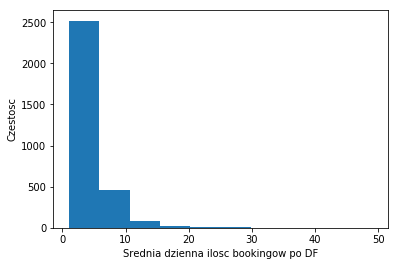

<Figure size 432x288 with 0 Axes>

In [222]:
plt.hist(data = after_count, x= 'booking_id')
plt.ylabel('Czestosc')
plt.xlabel('Srednia dzienna ilosc bookingow po DF')
fig=plt.figure()
plt.show();

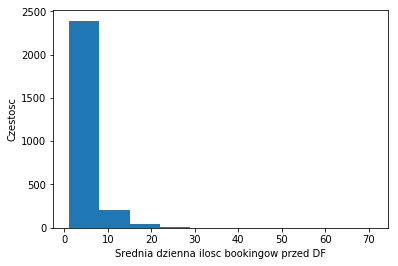

<Figure size 432x288 with 0 Axes>

In [223]:
plt.hist(data = before_count, x= 'booking_id')
plt.ylabel('Czestosc')
plt.xlabel('Srednia dzienna ilosc bookingow przed DF')
fig=plt.figure()
plt.show();

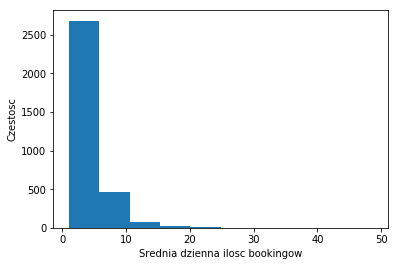

<Figure size 432x288 with 0 Axes>

In [224]:
plt.hist(data = overall_count, x= 'booking_id')
plt.ylabel('Czestosc')
plt.xlabel('Srednia dzienna ilosc bookingow')
fig=plt.figure()
plt.show();

Test t do sprawdzenia czy średnia ilośc bookingow przed i po DF jest różna

In [207]:
from scipy import stats

stats.ttest_ind(after_count.booking_id,before_count.booking_id, equal_var = False)

Ttest_indResult(statistic=-1.8899111773836659, pvalue=0.0588230717980883)

p.value > 0.5 
brak odrzucenia hipotezy o identycznych srednich, opublikowanie 1 DF *statystycznie nie zwieksza ilosci wizyt*

Sprawdźmy jeszcze ile DF srednio wrzuca biznes

In [220]:
temp_f = flyers[['flyer_date', 'business_id']].groupby(['business_id']).agg({"flyer_date": pd.Series.nunique}).reset_index()

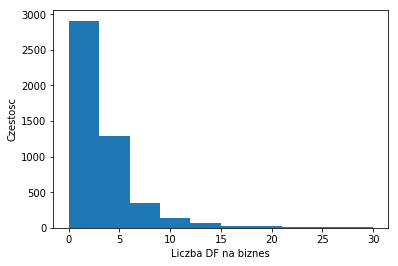

<Figure size 432x288 with 0 Axes>

In [221]:
plt.hist(data = temp_f, x= 'flyer_date', range = (0,30))
plt.ylabel('Czestosc')
plt.xlabel('Liczba DF na biznes')
fig=plt.figure()
plt.show();

TODO: w tej analizie w ogóle nie była brana pod uwagę liczba stworzonych DF przez biznes, warto by rozważyć jaka jest optymalna częstotliwość publikacji